# GP Regression Demo
This demonstration covers the basics of a supervised learning problem with gptorch:
* Defining a model
* Training the model
* Predicting with the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

np.random.seed(42)
torch.manual_seed(42)

In [2]:
from gptorch.models.gpr import GPR
from gptorch.models.sparse_gpr import VFE
from gptorch import kernels
from gptorch.util import TensorType

In [3]:
from gptorch import kernels

## Ground truth and training data
We'll try to model a simple one-dimensional sinusoid.

In [4]:
def f(x):
    return np.sin(2. * np.pi * x) + np.cos(3.5 * np.pi * x) - 3.0 * x + 5.0

In [5]:
n = 100
x = np.linspace(0, 1, n).reshape((-1, 1))
y = f(x) + 0.1 * np.random.randn(n, 1)

## Model definition
Here, we define the GP model.
The API is the same for exact or sparse GPs.

The main components of a GP model are:
* The mean function
* The kernel
* The likelihood

In [6]:
# Kernel

# kern = kernels.Rbf(1)
# kern = kernels.Matern32(1)
kern = kernels.Linear(1) + kernels.Rbf(1) + kernels.Constant(1)

In [7]:
# Mean function
mean_function = torch.nn.Linear(1, 1)  # Or any other PyTorch module!

In [8]:
# (Likelihood defaults to Gaussian)

In [9]:
# Try different models:
model = GPR(y, x, kern, mean_function=mean_function)
# model = VFE(y, x, kern)

## Train the model

In [10]:
# Train
model.optimize(method="L-BFGS-B", max_iter=100)
print("Trained model:")
print(model)

Scipy.optimize.minimize...
loss: [125.14461833]
loss: [100.32476456]
loss: [97.53899962]
loss: [95.74286434]
loss: [91.55895604]
loss: [77.67898473]
loss: [71.07083834]
loss: [69.49772267]
loss: [68.58179498]
loss: [282.84580193]
loss: [70.61279463]
loss: [68.19996815]
loss: [58.14214006]
loss: [18.76301093]
loss: [-53.95965047]
loss: [-48.37072941]
loss: [4453.75048164]
loss: [-64.17724549]
loss: [-67.24641811]
loss: [-68.37127251]
loss: [-68.49538123]
loss: [-68.58934855]
loss: [-68.90928314]
loss: [-69.06602483]
loss: [-69.14116451]
loss: [-69.19388136]
loss: [-69.31221346]
loss: [-69.43244324]
loss: [-69.57829404]
loss: [-69.69625028]
loss: [-69.70132773]
loss: [-69.72253621]
loss: [-69.62554444]
loss: [-69.76023683]
loss: [-69.84957461]
loss: [-70.03955286]
loss: [-70.27736477]
loss: [-70.50344002]
loss: [-70.70520667]
loss: [-70.6867204]
loss: [-70.83468375]
loss: [-70.91452454]
loss: [-70.96258766]
loss: [-70.9817702]
loss: [-70.97024372]
loss: [-70.98977978]
loss: [-71.00379439

## Predict

In [11]:
# Predict
n_test = 200
n_samples = 5
x_test = np.linspace(-1, 2, n_test).reshape((-1, 1))
mu, s = model.predict_y(x_test)
mu, s = mu.data.numpy().flatten(), s.data.numpy().flatten()
y_samp = model.predict_y_samples(x_test, n_samples).data.numpy()
unc = 2.0 * np.sqrt(s)

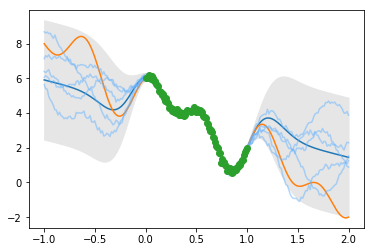

In [12]:
# Show prediction
x_test = x_test.flatten()
plt.figure()
plt.fill_between(x_test, mu - unc, mu + unc, color=(0.9,) * 3)
plt.plot(x_test, mu)
plt.plot(x_test, f(x_test))
for y_samp_i in y_samp:
    plt.plot(x_test, y_samp_i, color=(0.4, 0.7, 1.0), alpha=0.5)
plt.plot(x, y, 'o')
plt.show()